In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
d=pd.read_csv('loan_approved.csv')
d

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
d.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
d.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
d_cat=list(d.select_dtypes(object).columns)

In [7]:
d1=d[['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']]

## eda

In [8]:
d.rename(columns={'Loan_Status (Approved)':'Loan_Status'},inplace=True)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

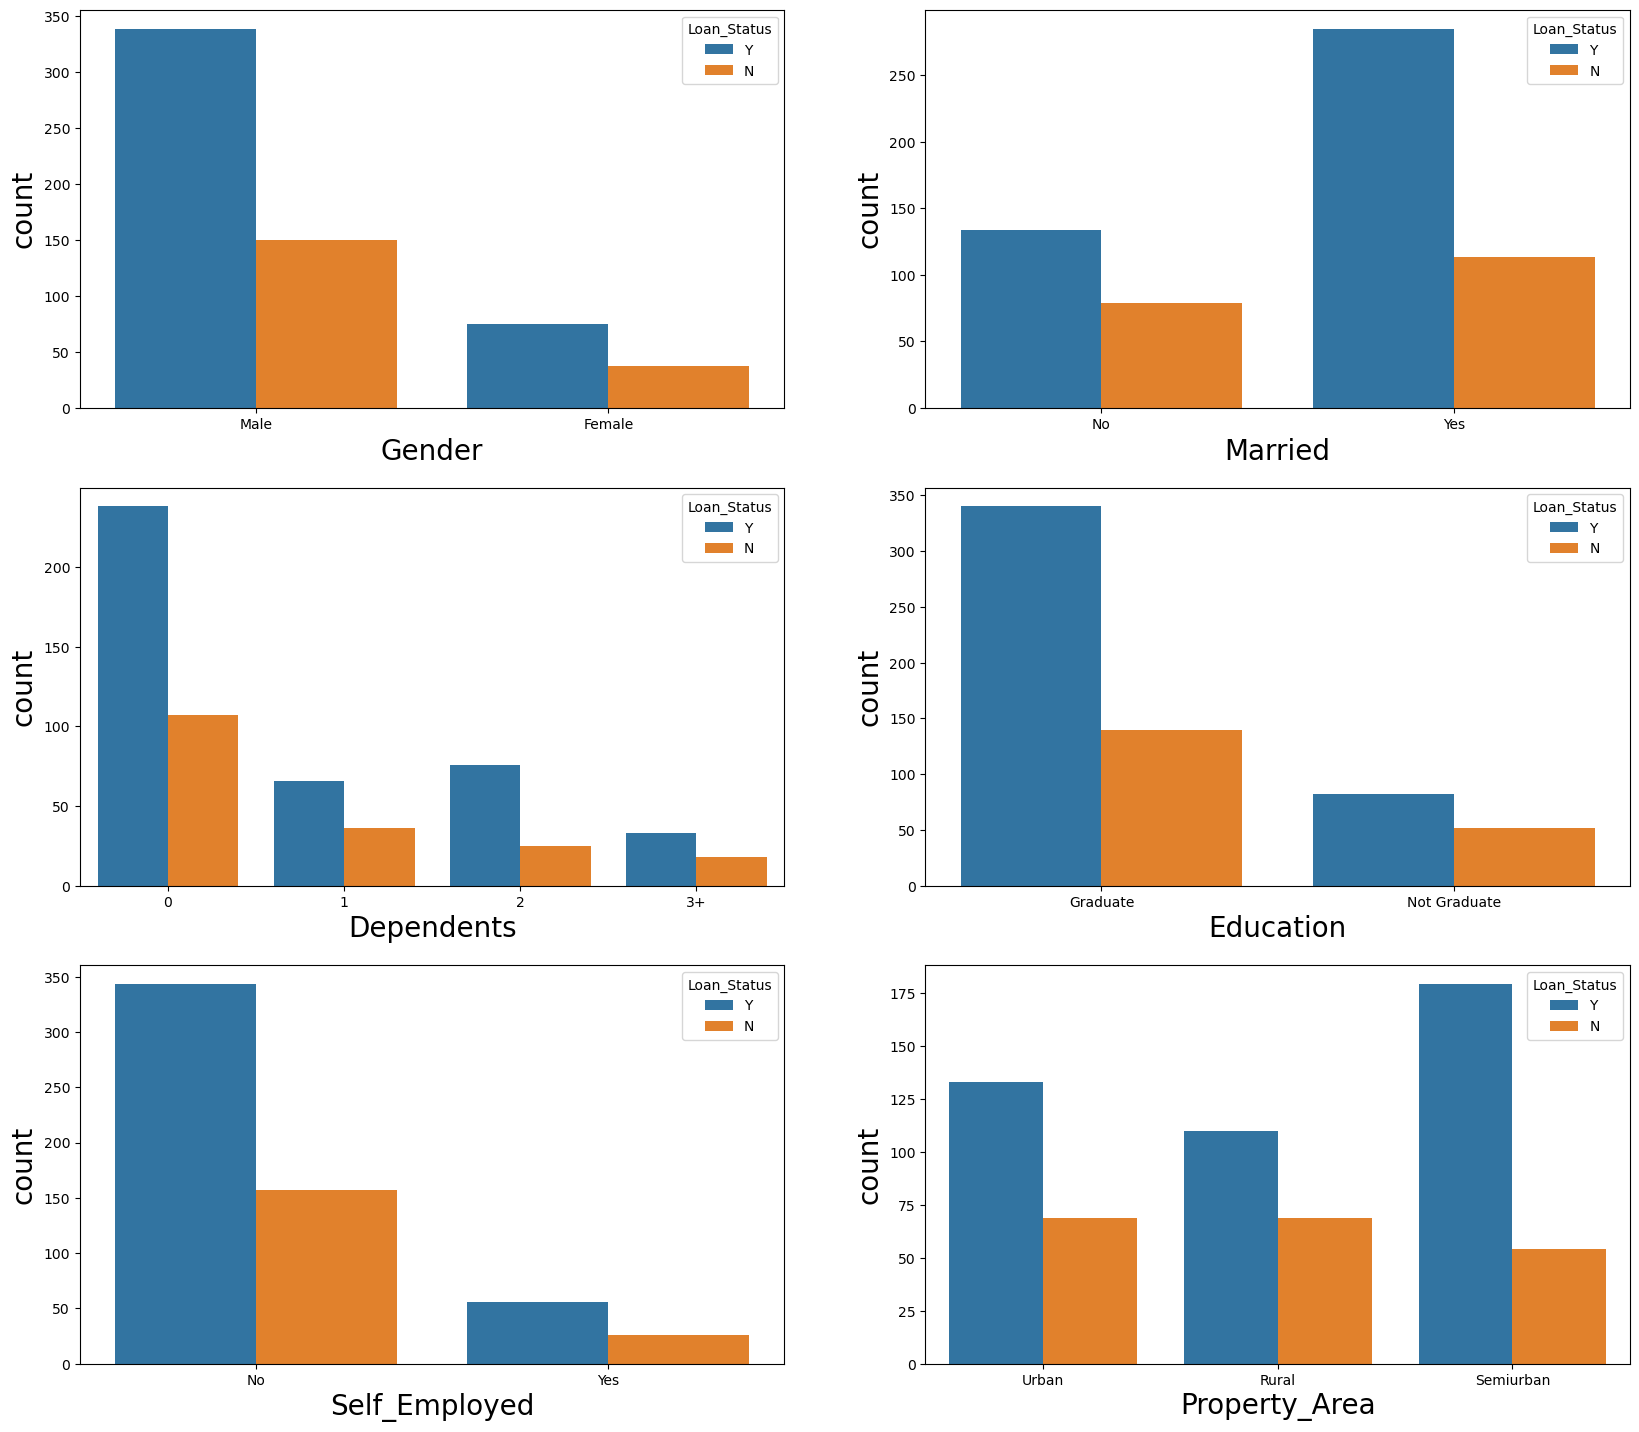

In [9]:
plt.figure(figsize=(20,30), facecolor='white')
plot=1

for col in d1:
    if plot<=16:
        ax=plt.subplot(5,2,plot)
        sns.countplot(x=d1[col].dropna(axis=0),hue=d['Loan_Status'])
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count', fontsize=20)
    plot+=1
plt.tight_layout
        

In [10]:
d_float=list(d.select_dtypes(float).columns)
d_float

['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [11]:
d2=d[['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

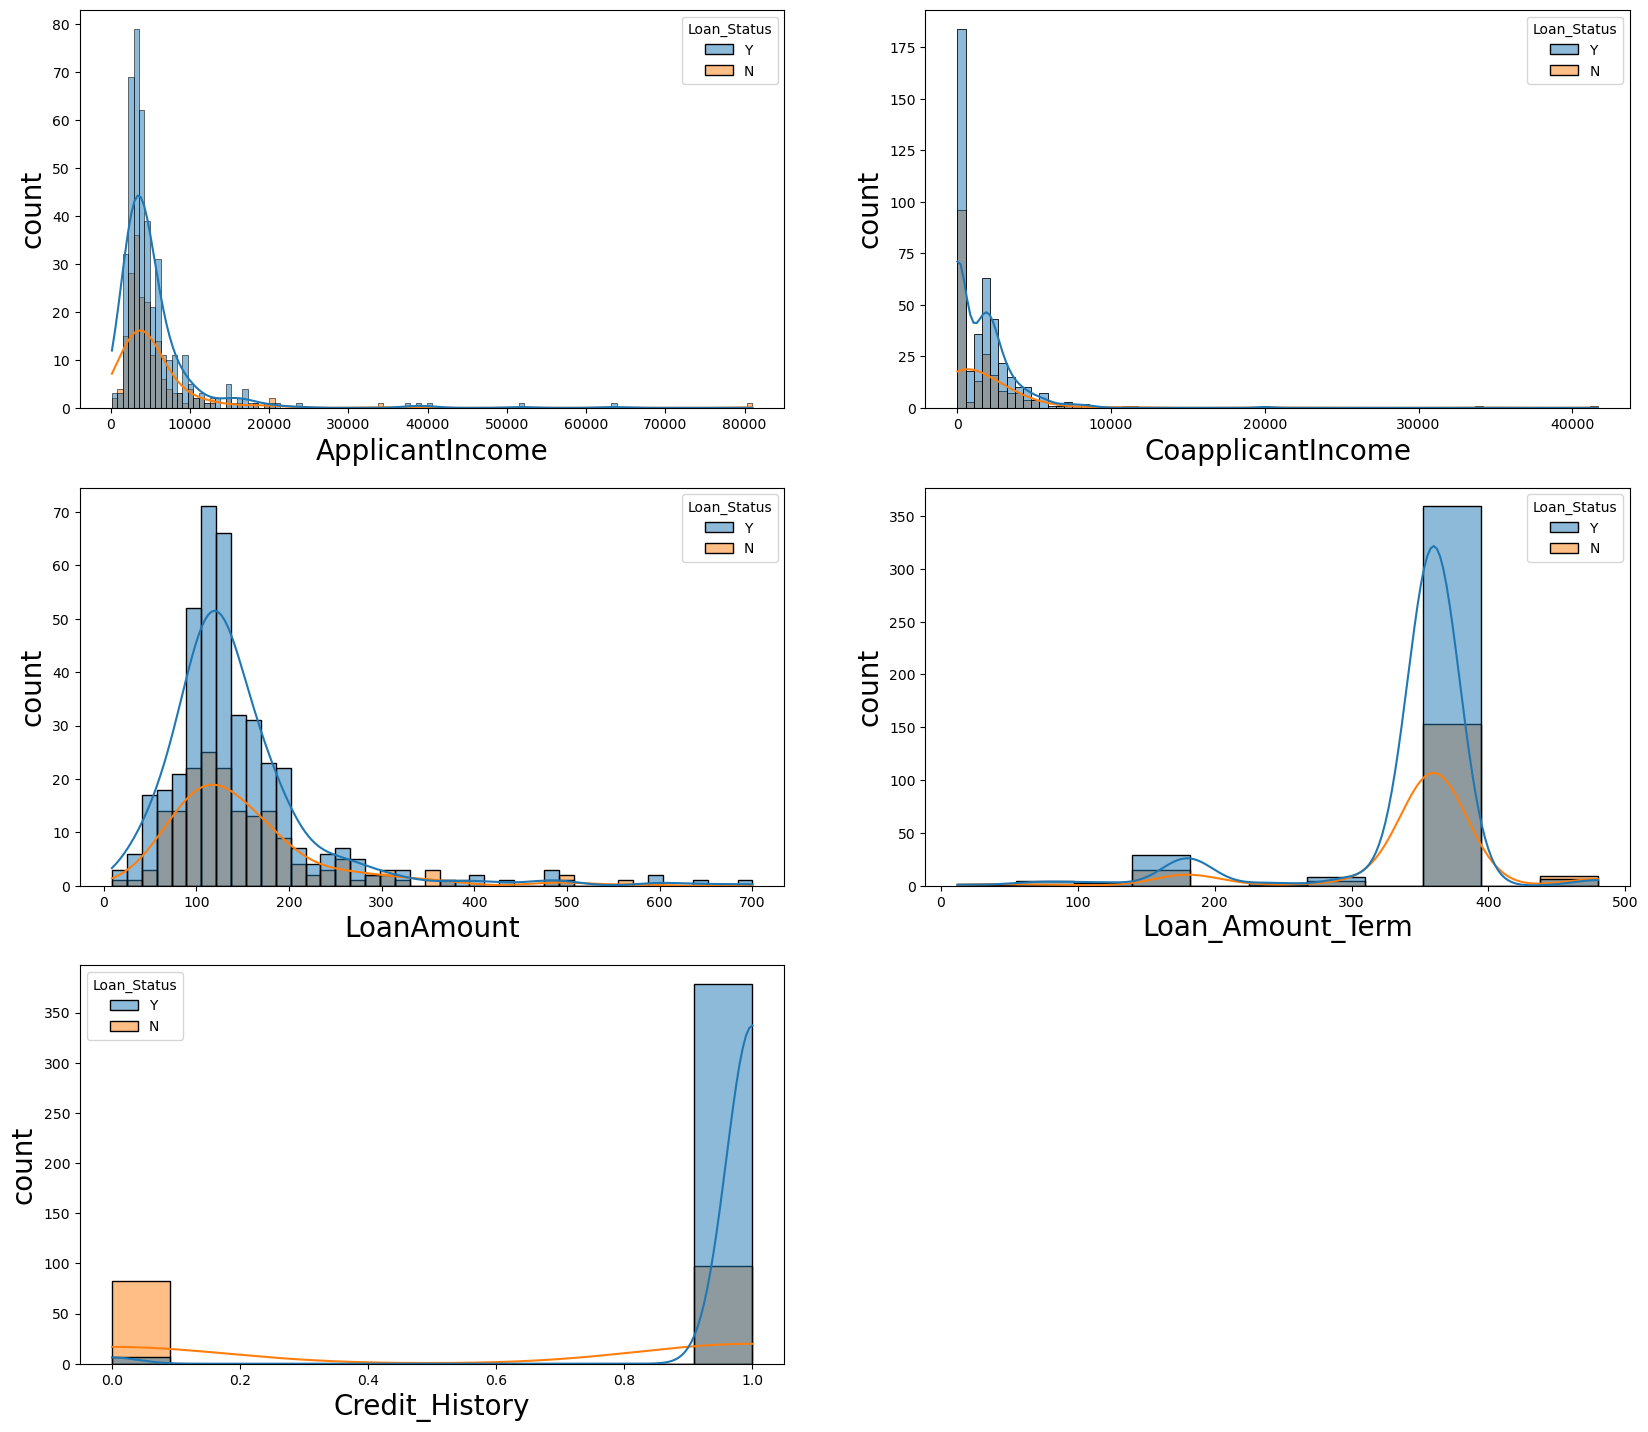

In [12]:
plt.figure(figsize=(20,30), facecolor='white')
plot=1

for col in d2:
    if plot<=16:
        ax=plt.subplot(5,2,plot)
        sns.histplot(x=d2[col].dropna(axis=0),hue=d['Loan_Status'], kde=True)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count', fontsize=20)
    plot+=1
plt.tight_layout

In [13]:
d.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
d['Gender'].isnull().sum()/len(d)*100

2.1172638436482085

In [15]:
d['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [16]:
d.loc[d['Gender'].isnull()==True,'Gender']='Male'

In [17]:
d.Gender.isnull().sum()

0

In [18]:
d['Married'].isnull().sum()/len(d)*100

0.4885993485342019

In [19]:
d['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [20]:
d.loc[d['Married'].isnull()==True,'Married']='Yes'

In [21]:
d['Dependents'].isnull().sum()/len(d)*100

2.44299674267101

In [22]:
d['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [23]:
d.loc[d['Dependents'].isnull()==True,'Dependents']='3+'

In [24]:
d['Self_Employed'].isnull().sum()/len(d)*100

5.211726384364821

In [25]:
d['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [26]:
d.loc[d['Self_Employed'].isnull()==True,'Self_Employed']='No' 

In [27]:
d['Credit_History'].isnull().sum()/len(d)*100

8.143322475570033

In [28]:
d['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [29]:
d.loc[d['Credit_History'].isnull()==True,'Credit_History']='1.0'

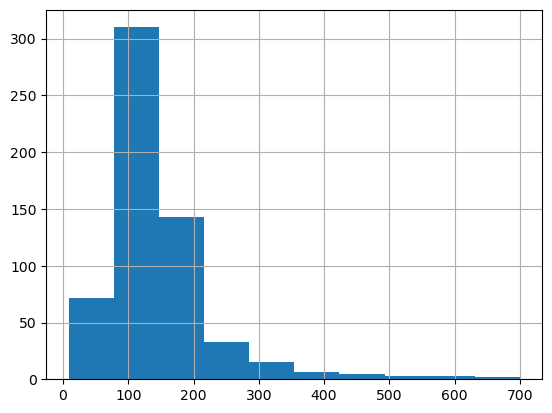

In [30]:
#Histogram since it has numerical value
d.LoanAmount.hist()
plt.show()

In [31]:
np.median(d.LoanAmount.dropna(axis=0))

128.0

In [32]:
d.loc[d['LoanAmount'].isnull()==True,'LoanAmount']=np.median(d['LoanAmount'].dropna(axis=0))

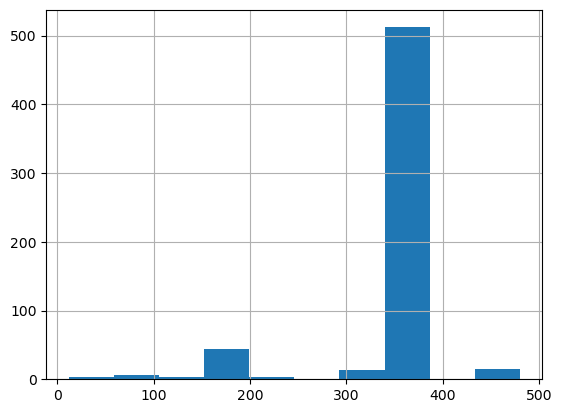

In [33]:
d['Loan_Amount_Term'].hist()
plt.show()

In [34]:
d.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [35]:
np.median(d.Loan_Amount_Term.dropna(axis=0))

360.0

In [36]:
d.loc[d['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(d['Loan_Amount_Term'].dropna(axis=0))

In [37]:
d.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
## Step 2 Handling the categorical data

df1=pd.get_dummies(d['Gender'],prefix='Gender',drop_first=True,dtype=int)
d=pd.concat([d,df1],axis=1).drop(['Gender'],axis=1)

In [39]:
df1=pd.get_dummies(d['Married'], prefix='Married', drop_first=True,dtype=int)
d=pd.concat([d,df1],axis=1).drop(['Married'],axis=1)

In [40]:
df1=pd.get_dummies(d['Education'],prefix='Education',drop_first=True,dtype=int)
d=pd.concat([d,df1],axis=1).drop(['Education'],axis=1)

In [41]:
df1=pd.get_dummies(d['Self_Employed'],prefix='Self_Employed',drop_first=True,dtype=int)
d=pd.concat([d,df1],axis=1).drop(['Self_Employed'],axis=1)

In [42]:
df1=pd.get_dummies(d['Property_Area'],prefix='Property_Area',drop_first=True,dtype=int)
d=pd.concat([d,df1],axis=1).drop(['Property_Area'],axis=1)

In [43]:
df1=pd.get_dummies(d['Loan_Status'],prefix='Loan_Status',drop_first=True,dtype=int)
d=pd.concat([d,df1],axis=1).drop(['Loan_Status'],axis=1)

In [52]:
df1=pd.get_dummies(d['Dependents'],prefix='Dependents',drop_first=True,dtype=int)
d=pd.concat([d,df1],axis=1).drop(['Dependents'],axis=1)

In [53]:
d.drop('Loan_ID',axis=1, inplace=True)
d.drop(0,axis=0)

KeyError: "['Loan_ID'] not found in axis"

In [54]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    float64
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    object 
 5   Gender_Male              614 non-null    int32  
 6   Married_Yes              614 non-null    int32  
 7   Education_Not Graduate   614 non-null    int32  
 8   Self_Employed_Yes        614 non-null    int32  
 9   Property_Area_Semiurban  614 non-null    int32  
 10  Property_Area_Urban      614 non-null    int32  
 11  Loan_Status_Y            614 non-null    int32  
 12  Dependents_1             614 non-null    int32  
 13  Dependents_2             614 non-null    int32  
 14  Dependents_3+            6

In [55]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

d[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scale.fit_transform(d[['ApplicantIncome','CoapplicantIncome',
                          'LoanAmount']])

<Axes: >

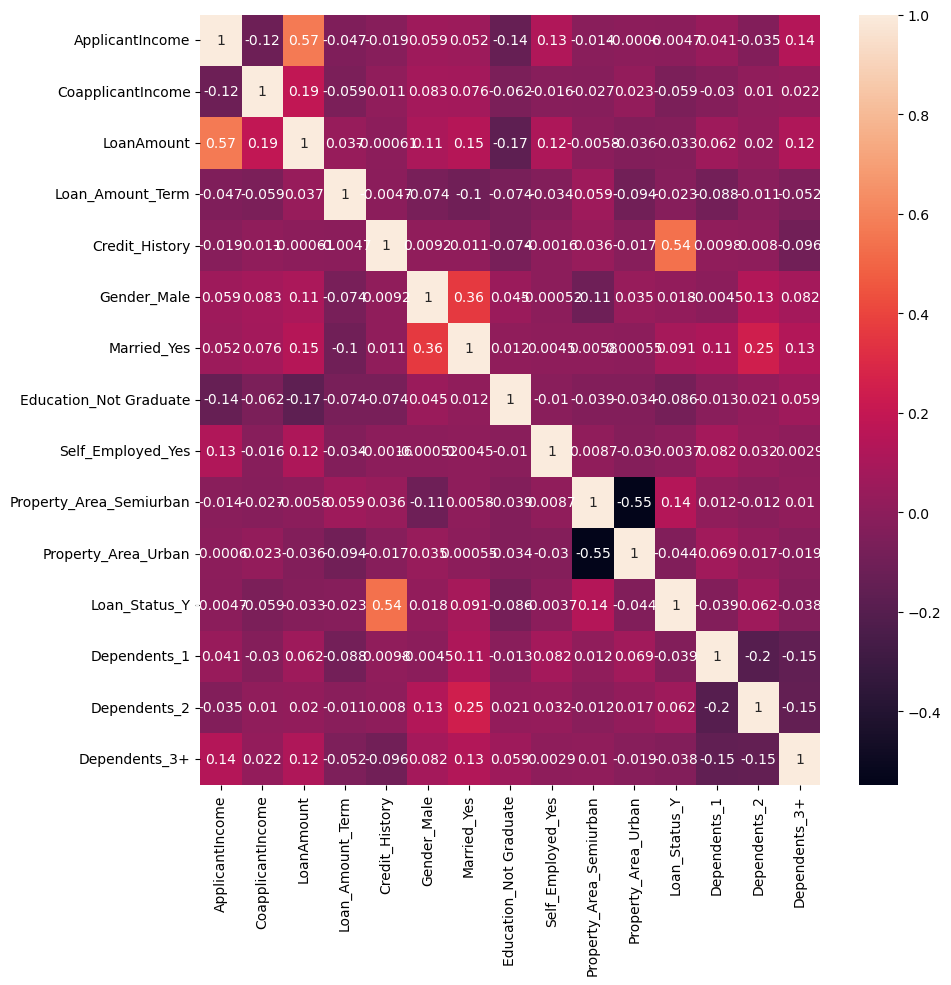

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(d.corr(),annot=True)

In [58]:
d.duplicated().sum()

0

In [59]:
d

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Dependents_1,Dependents_2,Dependents_3+
0,0.070489,0.000000,0.172214,360.0,1.0,1,0,0,0,0,1,1,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,1,1,0,1,0,1,1,0,0,0
3,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,0,0,1,1,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,360.0,1.0,0,0,0,0,0,0,1,0,0,0
610,0.048930,0.000000,0.044863,180.0,1.0,1,1,0,0,0,0,1,0,0,1
611,0.097984,0.005760,0.353111,360.0,1.0,1,1,0,0,0,1,1,1,0,0
612,0.091936,0.000000,0.257598,360.0,1.0,1,1,0,0,0,1,1,0,1,0


In [60]:
x=d.drop(['Loan_Status_Y'],axis=1)

In [61]:
y=d['Loan_Status_Y']

In [62]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,0.070489,0.000000,0.172214,360.0,1.0,1,0,0,0,0,1,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,1,1,0,0,0,0,1,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,1,1,0,1,0,1,0,0,0
3,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,0,0,1,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,360.0,1.0,0,0,0,0,0,0,0,0,0
610,0.048930,0.000000,0.044863,180.0,1.0,1,1,0,0,0,0,0,0,1
611,0.097984,0.005760,0.353111,360.0,1.0,1,1,0,0,0,1,1,0,0
612,0.091936,0.000000,0.257598,360.0,1.0,1,1,0,0,0,1,0,1,0


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=3)

In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [66]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [67]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 301, 0: 159})
SMOTE Classes Counter({1: 301, 0: 301})


In [69]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [70]:
y_hat=svclassifier.predict(x_test)

In [2]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

NameError: name 'y_test' is not defined

In [ ]:
print(classification_report(y_test,y_hat))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

In [1]:
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

NameError: name 'accuracy_score' is not defined